# Titanic Survival Analysis and Model Evaluation

In [32]:
import pandas as pd
import numpy as np

# Load the Dataset

In [54]:
data=pd.read_csv(r"E:\Users\Documents\College\Engineering\S.Y. Eng\Machine Learning\titanic\train - Copy.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  700 non-null    int64  
 1   Survived     700 non-null    int64  
 2   Pclass       700 non-null    int64  
 3   Name         700 non-null    object 
 4   Sex          700 non-null    object 
 5   Age          555 non-null    float64
 6   SibSp        700 non-null    int64  
 7   Parch        700 non-null    int64  
 8   Ticket       700 non-null    object 
 9   Fare         700 non-null    float64
 10  Cabin        157 non-null    object 
 11  Embarked     699 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 65.8+ KB


# Data Preprocessing

In [56]:
newdata = data.drop(["Cabin", "Name", "PassengerId", "SibSp", "Parch", "Ticket", "Embarked"], axis="columns")

In [57]:
newdata.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


# Map numerical Pclass to categorical labels

In [58]:
class_mapping = {1: 'first', 2: 'second', 3: 'third'}

# Apply the mapping to the 'person' column
newdata['Pclass'] = newdata['Pclass'].map(class_mapping)

print(newdata.head())

   Survived Pclass     Sex   Age     Fare
0         0  third    male  22.0   7.2500
1         1  first  female  38.0  71.2833
2         1  third  female  26.0   7.9250
3         1  first  female  35.0  53.1000
4         0  third    male  35.0   8.0500


In [59]:
mean_age = newdata.Age.mean()
newdata.Age.fillna(mean_age,inplace=True)

# Check for missing values

In [60]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  700 non-null    int64  
 1   Pclass    700 non-null    object 
 2   Sex       700 non-null    object 
 3   Age       700 non-null    float64
 4   Fare      700 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 27.5+ KB


In [61]:
newdata.describe()

,Survived,Age,Fare
count,700.000000,700.000000,700.000000
mean,0.387143,30.041892,32.220416
std,0.487445,13.067514,48.281945
min,0.000000,0.750000,0.000000
25%,0.000000,22.000000,7.925000
50%,0.000000,30.041892,14.500000
75%,1.000000,36.000000,31.275000
max,1.000000,80.000000,512.329200


# Convert Categorical Data to Numerical

In [62]:
data1=pd.get_dummies(newdata)
data1.head()

,Survived,Age,Fare,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male
0,0,22.0,7.2500,False,False,True,False,True
1,1,38.0,71.2833,True,False,False,True,False
2,1,26.0,7.9250,False,False,True,True,False
3,1,35.0,53.1000,True,False,False,True,False
4,0,35.0,8.0500,False,False,True,False,True


In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       700 non-null    int64  
 1   Age            700 non-null    float64
 2   Fare           700 non-null    float64
 3   Pclass_first   700 non-null    bool   
 4   Pclass_second  700 non-null    bool   
 5   Pclass_third   700 non-null    bool   
 6   Sex_female     700 non-null    bool   
 7   Sex_male       700 non-null    bool   
dtypes: bool(5), float64(2), int64(1)
memory usage: 20.0 KB


# Split features (X) and target variable (Y)

In [64]:
X=data1.drop(["Survived"],axis=1)
Y=data1.Survived
print(X.head())
print(Y.head())

    Age     Fare  Pclass_first  Pclass_second  Pclass_third  Sex_female  \
0  22.0   7.2500         False          False          True       False   
1  38.0  71.2833          True          False         False        True   
2  26.0   7.9250         False          False          True        True   
3  35.0  53.1000          True          False         False        True   
4  35.0   8.0500         False          False          True       False   

   Sex_male  
0      True  
1     False  
2     False  
3     False  
4      True  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Model Evaluation

In [66]:
# Modeling by Logistic
from sklearn.linear_model import LogisticRegression
eqn=LogisticRegression()
eqn.fit(X_train,Y_train)
Ytrain_pred_log=eqn.predict(X_train)
Ytest_pred_log=eqn.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training accuracy:", accuracy_score(Y_train,Ytrain_pred_log))
print("Testing accuracy:",accuracy_score(Y_test,Ytest_pred_log))

Training accuracy: 0.8
Testing accuracy: 0.7785714285714286


In [67]:
# Decision tree classifier without gridsearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
ytest_pred_dt=dtc.predict(X_test)
ytrain_pred_dt=dtc.predict(X_train)
print("Train Accuracy:",accuracy_score(Y_train,ytrain_pred_dt))
print("Test Accuracy:",accuracy_score(Y_test,ytest_pred_dt))

Train Accuracy: 0.9803571428571428
Test Accuracy: 0.8


In [68]:
# Decision tree classifier with gridsearchCV
from sklearn.tree import DecisionTreeClassifier
dtc_gs = DecisionTreeClassifier(random_state=4)
# param_dist_dtc={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7]}
param_dist_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
from sklearn.model_selection import GridSearchCV
grid_dtc=GridSearchCV(dtc,param_grid=param_dist_dtc,cv=5,scoring='accuracy',n_jobs=-1)
grid_dtc.fit(X_train,Y_train)
grid_dtc.best_params_
ytest_pred_dtcGS=grid_dtc.predict(X_test)
ytrain_pred_dtcGS=grid_dtc.predict(X_train)
print("Train Accuracy:",accuracy_score(Y_train,ytrain_pred_dtcGS))
print("Test Accuracy:",accuracy_score(Y_test,ytest_pred_dtcGS))

Train Accuracy: 0.8517857142857143
Test Accuracy: 0.8071428571428572


In [69]:
# Random forest classifier without GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
Ytrain_pred_rfc=rfc.predict(X_train)
Ytest_pred_rfc=rfc.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train,Ytrain_pred_rfc))
print("Test Accuracy:",accuracy_score(Y_test,Ytest_pred_rfc))

Train Accuracy: 0.9803571428571428
Test Accuracy: 0.8357142857142857


In [70]:
# RandomForestClassifier with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc_gs=RandomForestClassifier()
param_dist_rfc={"max_depth":[3,5,6],"n_estimators":[100,200],"criterion":["gini","entropy"]}
print("Tuning Parameters:", param_dist_rfc)
from sklearn.model_selection import GridSearchCV
grid_rfc=GridSearchCV(rfc_gs,param_dist_rfc,cv=5,n_jobs=-1)
grid_rfc.fit(X_train,Y_train)
Ytrain_pred_rfc_gs=grid_rfc.predict(X_train)
Ytest_pred_rfc_gs=grid_rfc.predict(X_test)
print("training accuracy:",accuracy_score(Y_train,Ytrain_pred_rfc_gs))
print("testing accuracy:",accuracy_score(Y_test,Ytest_pred_rfc_gs))

Tuning Parameters: {'max_depth': [3, 5, 6], 'n_estimators': [100, 200], 'criterion': ['gini', 'entropy']}
training accuracy: 0.8589285714285714
testing accuracy: 0.8285714285714286


In [71]:
grid_rfc.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [72]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.7757142857142856


In [73]:
Y_test.head()

158    0
500    0
396    0
155    0
321    0
Name: Survived, dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Ytest_pred_rfc)

conf_matrix_labeled = pd.DataFrame(
    conf_matrix,
    index=["Actual Died", "Actual Survived"],
    columns=["Predicted Died", "Predicted Survived"]
)

print(conf_matrix_labeled)

                 Predicted Died  Predicted Survived
Actual Died                  75                   7
Actual Survived              16                  42


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, precision_recall_curve,
    classification_report
)

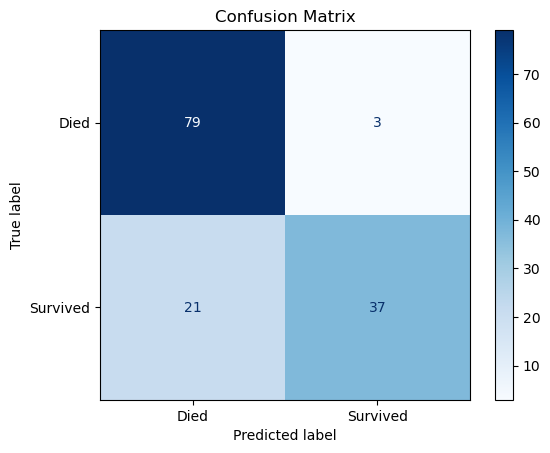

In [78]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Ytest_pred_rfc_gs)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

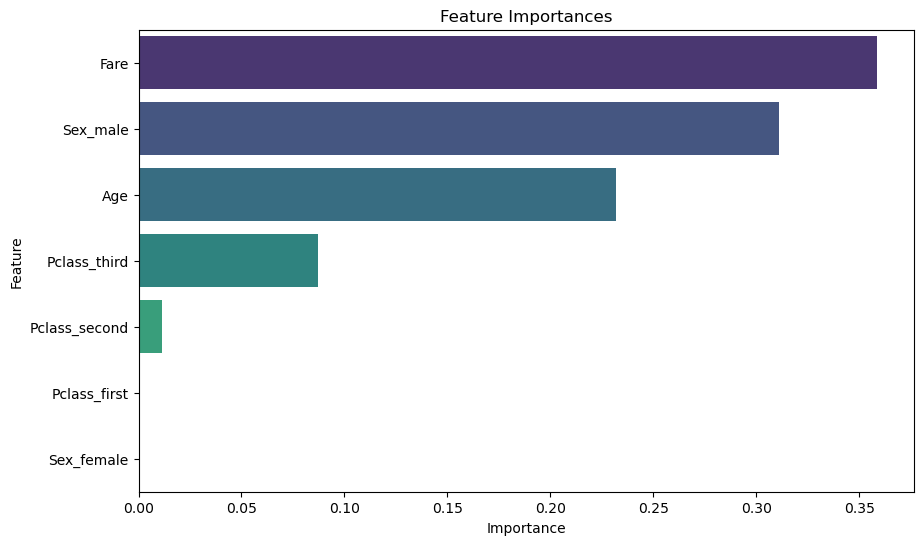

In [79]:
# 2. Feature Importance (if using a tree-based model)
if hasattr(dtc, "feature_importances_"):
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': dtc.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importances')
    plt.show()

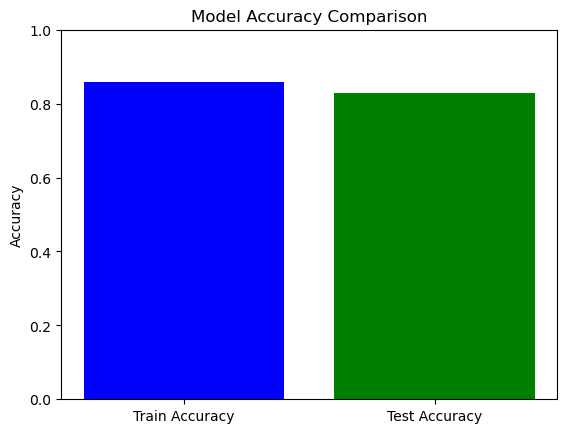

In [80]:
# 3. Train vs Test Accuracy
train_acc = accuracy_score(Y_train, Ytrain_pred_rfc_gs)
test_acc = accuracy_score(Y_test, Ytest_pred_rfc_gs)

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'green'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

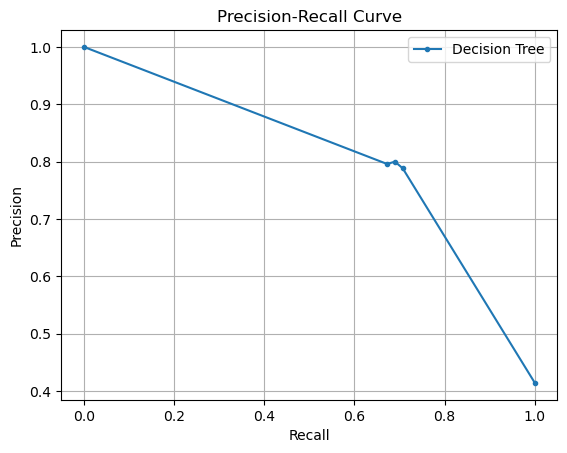

In [81]:
# 4. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, dtc.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

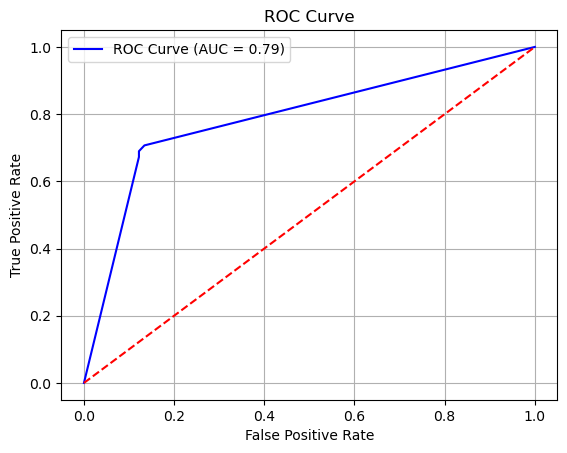

In [82]:
# 5. ROC Curve
fpr, tpr, _ = roc_curve(Y_test, dtc.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(Y_test, dtc.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

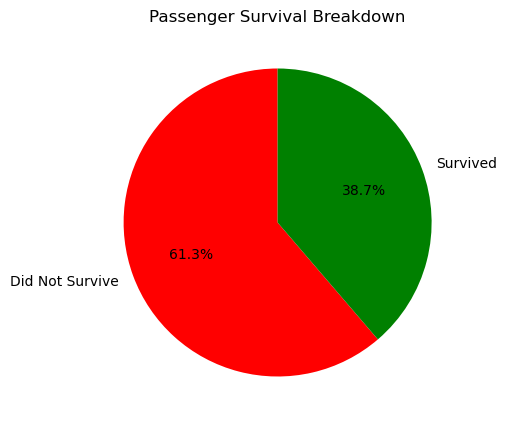

In [83]:
# 1. Survival Breakdown
plt.figure(figsize=(8, 5))
data['Survived'].value_counts().plot.pie(
    labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title("Passenger Survival Breakdown")
plt.ylabel("")
plt.show()

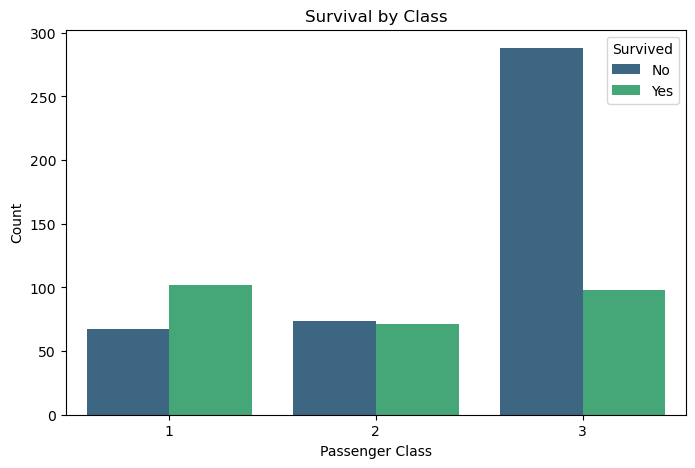

In [84]:
# 2. Survival by Class
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='viridis')
plt.title("Survival by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

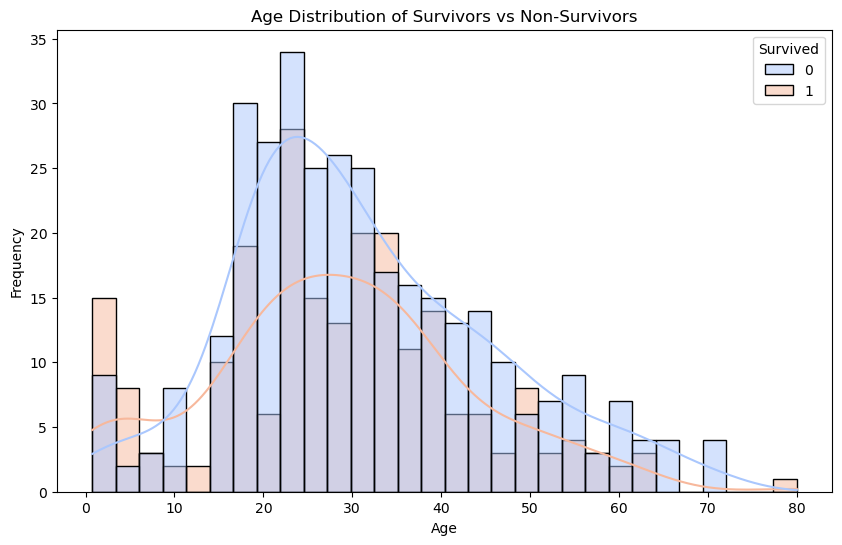

In [85]:
# 4. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, palette='coolwarm', bins=30)
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

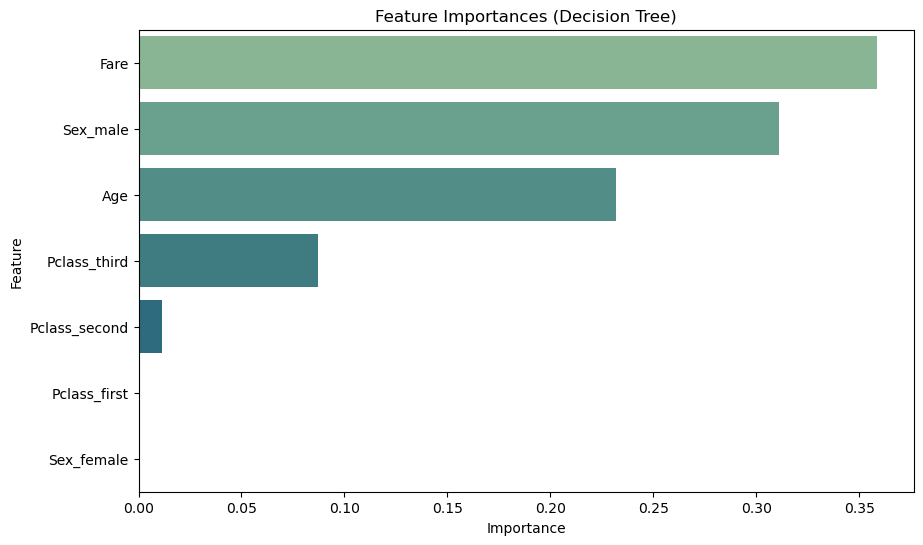

In [86]:
# 6. Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtc.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='crest')
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()